# Brain Tumor Detection

### For Google Colab Users

In [ ]:
#@title ## Mount Your Google Drive & Map your Directory
#@markdown Please run this cell (`Ctrl+Enter` or `Shift+Enter`) and follow the steps printed bellow.
import os

from google.colab import drive
drive.mount('/content/gdrive')

# check Google Drive is mounted
if not os.path.isdir("/content/gdrive"):
  raise FileNotFoundError("Your Google Drive isn't mounted. Please run the above cell.")

assignment_dir = "/content/gdrive/MyDrive/workspace/BrainTumorDetection"  #@param{type:"string"}
assignment_dest = "/content/project"

# create symbolic link
!rm -f {assignment_dest}
!ln -s "{assignment_dir}" "{assignment_dest}"
print(f'Succesfully mapped (ln -s) "{assignment_dest}" -> "{assignment_dir}"')

# cd to linked dir
%cd -q {assignment_dest}
print(f'Succesfully changed directory (cd) to "{assignment_dest}"')

Mounted at /content/gdrive
Succesfully mapped (ln -s) "/content/project" -> "/content/gdrive/MyDrive/workspace/BrainTumorDetection"
Succesfully changed directory (cd) to "/content/project"


### Init

In [1]:
#@title ##Init

#@markdown Import required modules and observe your resources

# auto reload
%load_ext autoreload
%autoreload 2

# import
import torch
import torchvision
from PIL import Image
import matplotlib.pyplot as plt
import random
import os
import wandb
wandb.login()

from experiment import Experiment
from network import get_model_and_optim

# Show resources
!nvidia-smi

wandb: Currently logged in as: sgvdan (use `wandb login --relogin` to force relogin)


Sat Jul  3 11:23:09 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 455.45.01    CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro RTX 6000     Off  | 00000000:15:00.0 Off |                  Off |
| 33%   34C    P8    14W / 260W |      0MiB / 24220MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Experiment

In [76]:
# params
config = {
"model_name": "vgg19",
"data_train_path": os.path.join(".", "Data", "Training"),
"data_test_path": os.path.join(".", "Data", "Testing"),
"epochs": 3,
"train_batch_size": 200,
"lr": 1e-4,
"heatmap_batch_size": 256,
"occlusion_size": (60,60),
"heat_layers" : [2, 5, 10, 12, 14, 16, 19, 23, 25, 28, 34],
"shuffle_data": True,
"device": "cuda"
}
with wandb.init(project="BrainTumorDetection", config=config):
    experiment = Experiment(config)
    #     experiment.train_model()
    heatmaps = experiment.generate_heatmap(r"./Data/Testing/glioma_tumor/image.jpg")

memory/usage,3253.17236
_runtime,175
_timestamp,1625313971
_step,256


memory/usage,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
_runtime,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


L2C55
L5C50
L10C242
L12C77
L14C239
L16C114
L19C73
L23C449
L25C334
L28C450
L34C62


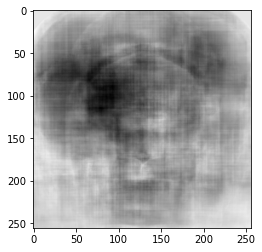

In [72]:
for key, heatmap in heatmaps.items():
    print(key)
    plt.imshow(heatmap.cpu(), cmap="gray")


In [69]:
len([str(experiment.model)])

1